# Data Loading and Cleaning

In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time

spotify_data = pd.read_csv('/content/drive/MyDrive/2024-2025/CS M148/project/spotify_dataset.csv')

spotify_data.sample(20)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
25336,25336,0f7a6m3AFaFM6uSG4PASl0,Isaac Hayes,pov: you rock around the christmas tree,The Mistletoe And Me,0,239280,False,0.331,0.420,...,-9.251,1,0.0292,0.658000,0.000026,0.0537,0.1570,95.862,4,disco
63804,63804,00nmZvZRyzQiYe2tAcDDUb,Ling tosite sigure,i'mperfect,abnormalize,51,216666,False,0.373,0.897,...,-4.052,1,0.0702,0.000008,0.151000,0.0676,0.3690,87.477,4,j-rock
45684,45684,0og2U8tsBAR7NJysRR6uBU,Al Di Meola;John McLaughlin;Paco de Lucía,Friday Night in San Francisco,Mediterranean Sundance / Rio Ancho - Live at W...,49,691306,False,0.415,0.576,...,-11.628,0,0.0331,0.834000,0.808000,0.6980,0.5560,100.540,4,guitar
6673,6673,5hduHc1QcT6s2MuJPQv2I6,Hypocrisy,Virus,Compulsive Psychosis,18,254506,False,0.303,0.971,...,-3.826,1,0.0852,0.000003,0.594000,0.3540,0.1400,179.972,4,black-metal
72408,72408,2nuA1esWzYEgnfQ4DpsSsm,Trivium,Ascendancy,Dying in Your Arms,53,173160,False,0.446,0.933,...,-3.605,0,0.0537,0.000025,0.000097,0.0850,0.7530,159.961,4,metalcore
107777,107777,1Vhs2UCIU2nI1u7MqQcJF8,Fangoria,Una Temporada en el Infierno,Me Odio Cuando Miento,23,268200,False,0.845,0.678,...,-11.578,1,0.0795,0.713000,0.000824,0.0939,0.3980,120.005,4,synth-pop
56192,56192,25gacl0dFF9HTclx7Ug7xC,Valley,Last Birthday,Like 1999,69,144742,True,0.733,0.382,...,-7.955,1,0.0459,0.132000,0.000000,0.1620,0.5170,98.027,4,indie-pop
24918,24918,2oM9nk4LFNCdwmrplPIq0D,Robert Hood,Point Blank,The Pipes,7,357573,False,0.618,0.983,...,-11.204,1,0.0566,0.008520,0.942000,0.1090,0.3890,143.295,4,detroit-techno
18712,18712,15UnyfRyyqjFZATgTXIZuN,Ali Siddiq,Damaged Goods,A Little Help Please,22,135679,True,0.430,0.786,...,-10.908,1,0.8340,0.850000,0.000000,0.9210,0.2130,91.171,4,comedy
72033,72033,4Y7eqYTpV7fQxpYj1isN2F,We Came As Romans;Caleb Shomo,Black Hole,Black Hole,70,179181,False,0.480,0.958,...,-4.241,0,0.0664,0.000024,0.000000,0.5200,0.3850,110.050,4,metalcore


In [2]:
spotify_data = spotify_data.drop(columns=['Unnamed: 0'])

Get shape of dataset (number of rows and cols)

In [3]:
spotify_data.shape

(114000, 20)

Get a summary of numeric columns

Observations:
- The min duration_ms of a song is ~0ms, which may be strange. Possible future to-do: remove songs that are 0ms long

In [4]:
spotify_data.select_dtypes('number').describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Find any duplicate rows from the dataset

In [5]:
duplicate_mask = spotify_data.duplicated(keep=False)

# Filter the dataframe to show only the duplicate rows
duplicate_rows = spotify_data[duplicate_mask]

# Get the count of completely duplicate rows
num_duplicates = len(duplicate_rows)
print(f"Number of rows that are duplicates/Number of total rows: {num_duplicates}/{spotify_data.shape[0]}")

# Sort the duplicate rows by all columns to group identical rows together
duplicate_rows_sorted = duplicate_rows.sort_values(spotify_data.columns.tolist())

duplicate_rows_sorted

Number of rows that are duplicates/Number of total rows: 894/114000


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
52714,00JZ83w0Qm09f4PwWj06sM,George Jones,With Love,A Good Year For The Roses,12,190546,False,0.491,0.334,11,-9.684,1,0.0287,0.659,0.000016,0.1160,0.2490,91.674,4,honky-tonk
52766,00JZ83w0Qm09f4PwWj06sM,George Jones,With Love,A Good Year For The Roses,12,190546,False,0.491,0.334,11,-9.684,1,0.0287,0.659,0.000016,0.1160,0.2490,91.674,4,honky-tonk
39275,02KmEChUwcjxG3G29kbLFT,Hans Zimmer;Henning Lohner;Martin Tillman;Fiac...,Hans Zimmer: Epic Scores,Shelter Mountain,16,250520,False,0.144,0.262,9,-21.228,1,0.0641,0.876,0.755000,0.1440,0.0345,94.430,4,german
39307,02KmEChUwcjxG3G29kbLFT,Hans Zimmer;Henning Lohner;Martin Tillman;Fiac...,Hans Zimmer: Epic Scores,Shelter Mountain,16,250520,False,0.144,0.262,9,-21.228,1,0.0641,0.876,0.755000,0.1440,0.0345,94.430,4,german
93331,02MRylJ1WAgxzdqfNfdIsR,Oleg Pogudin,Любовь и разлука. Песни Исаака Шварца,"Город пышный, город бедный",0,114600,False,0.446,0.121,4,-12.737,0,0.0414,0.937,0.000000,0.1250,0.1800,107.573,3,romance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52570,7zBY3YjvcdkpbHIUx0fe5Q,Hank Williams,Hank Williams As Luke The Drifter (Expanded Ed...,Everything's Okay,12,172026,False,0.607,0.378,7,-13.581,1,0.1480,0.837,0.000000,0.0752,0.8700,73.728,4,honky-tonk
93290,7zkgAyL3DS6PE5FWzk3QKM,Vladimir Nechaev,Душевные песни из советских кинофильмов,"Ты рядом со мной - Из к/ф ""Наши соседи""",1,207438,False,0.336,0.315,2,-10.006,0,0.0312,0.875,0.000004,0.4260,0.4540,147.996,3,romance
93328,7zkgAyL3DS6PE5FWzk3QKM,Vladimir Nechaev,Душевные песни из советских кинофильмов,"Ты рядом со мной - Из к/ф ""Наши соседи""",1,207438,False,0.336,0.315,2,-10.006,0,0.0312,0.875,0.000004,0.4260,0.4540,147.996,3,romance
16719,7zo05whm8LBnnt1dG979ov,Wolfgang Amadeus Mozart;Wiener Mozart Ensemble...,Mozart - A Classical Dawn,"Six German Dances, K.571: No. 5 in B Flat Major",3,92000,False,0.539,0.158,10,-15.544,1,0.0356,0.976,0.498000,0.1510,0.6850,88.180,3,classical


Drop duplicate rows

In [6]:
spotify_data_unique = spotify_data.drop_duplicates()

num_unique = len(spotify_data_unique)
print(f"Number of unique rows: {num_unique}")

Number of unique rows: 113550


Check for any NA values

In [7]:
# Get the sum of all NA values for each column
na_values = spotify_data_unique.isna().sum()
na_values

,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0


We see that there are some NA values in `artists` and `album_name` column. Find which observational units have these.

In [8]:
na_artists = spotify_data[spotify_data['artists'].isna()]
print(na_artists)

na_album_name = spotify_data[spotify_data['album_name'].isna()]
print(na_album_name)

na_track_name = spotify_data[spotify_data['track_name'].isna()]
print(na_track_name)

                     track_id artists album_name track_name  popularity  \
65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
65900            0     False         0.501   0.583    7     -9.46     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
65900       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature track_genre  
65900  138.391               4       k-pop  
                     track_id artists album_name track_name  popularity  \
65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
65900            0     False         0.501   0.583    7     -9.46     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
65900       0.0605          0.69           0.00396    0.0747    0.734   

         tem

From the results, we see only one observatoinal unit has the NA value, and the NA value is a categorical / string data type. Thus, it may not be best suited to create a imputation function to impute these two NA variables because there is no "mean", "mode", etc for them. Instead, we can simply remove this single NA row in hopes the dataset results will not be too skewed by this removal.

This observational unit also has a `duration_ms` of 0ms which is also strange. Thus, it is best to remove this unit from our dataset.

In [9]:
# Drop rows where either 'artists' or 'album_name' or 'track_name' has NA values
spotify_data_cleaned = spotify_data_unique.dropna(subset=['artists', 'album_name', 'track_name'])

# Display the number of remaining rows and cols and check if any NA values remain in those columns
print(f"Number of rows and cols after removing NA valeus: {spotify_data_cleaned.shape}")

# Check that none of the columns contains NA values
spotify_data_cleaned.isna().sum() == 0


Number of rows and cols after removing NA valeus: (113549, 20)


,0
track_id,True
artists,True
album_name,True
track_name,True
popularity,True
duration_ms,True
explicit,True
danceability,True
energy,True
key,True


# Neural Network

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt

data = spotify_data_cleaned

Here we select our input features and target feature: we will be using loudness, acousticness, valence, popularity, duration in ms, danceability, speechiness, instrumentalness, and liveness to predict energy.  The data is split into training and test sets, and features are standardized to mean 0 and variance 1.

In [11]:
X = data[['loudness', 'acousticness', 'valence', 'popularity', 'duration_ms', 'danceability', 'speechiness', 'instrumentalness', 'liveness']]
y = data['energy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

Here we build our model: 2 layers, the first with 64 neurons and the second with 16, with the final layer being the output. Our activation functions are relu because of its simplicity and effectiveness. we use adam as our optimizer here because empirically it produces results very effectively and efficiently.

In [12]:
class EnergyPredictor(nn.Module):
    def __init__(self):
        super(EnergyPredictor, self).__init__()
        self.fc1 = nn.Linear(9, 64)
        self.fc2 = nn.Linear(64, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = EnergyPredictor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Now we actually train the model. The motivation behind our hyperparams is as follows: the model is relatively simple and as such a large number of epochs is redundant; empirically the model stops learning around the 10 epoch mark. Batch size is large as we have a lot of rows of data, and I found that using two layers with 64 and 16 nodes performed better than a (64,32) setup as well as a 3- or 1-layer model. The real hyperparam here to watch out for is the learning rate: I tested rates from 1 to 1e-7 as well as 3e-7 to 3e-1, and found that 1e-3 seems to perform well without overfitting. Our loss function here in the prediction model is MSE, which is chosen as the target variable is continuous between 0 and 1. Additionally, it's a very simple loss metric which is suitable for the task at hand.

In [13]:
epochs = 10
batch_size = 128
train_losses = []
val_losses = []
for epoch in tqdm(range(epochs), desc="Training Progress"):
    model.train()
    permutation = torch.randperm(X_train.size(0))
    epoch_loss = 0.0
    for i in range(0, X_train.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_X, batch_y = X_train[indices], y_train[indices]

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    train_losses.append(epoch_loss / (X_train.size(0) // batch_size))

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
    val_losses.append(val_loss.item())


    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}")

Training Progress:  10%|█         | 1/10 [00:01<00:10,  1.19s/it]

Epoch [1/10], Train Loss: 0.0222, Validation Loss: 0.0118


Training Progress:  20%|██        | 2/10 [00:02<00:08,  1.06s/it]

Epoch [2/10], Train Loss: 0.0116, Validation Loss: 0.0112


Training Progress:  30%|███       | 3/10 [00:03<00:07,  1.04s/it]

Epoch [3/10], Train Loss: 0.0110, Validation Loss: 0.0110


Training Progress:  40%|████      | 4/10 [00:04<00:06,  1.01s/it]

Epoch [4/10], Train Loss: 0.0107, Validation Loss: 0.0104


Training Progress:  50%|█████     | 5/10 [00:05<00:05,  1.01s/it]

Epoch [5/10], Train Loss: 0.0104, Validation Loss: 0.0103


Training Progress:  60%|██████    | 6/10 [00:06<00:04,  1.01s/it]

Epoch [6/10], Train Loss: 0.0103, Validation Loss: 0.0103


Training Progress:  70%|███████   | 7/10 [00:07<00:03,  1.00s/it]

Epoch [7/10], Train Loss: 0.0101, Validation Loss: 0.0099


Training Progress:  80%|████████  | 8/10 [00:08<00:01,  1.00it/s]

Epoch [8/10], Train Loss: 0.0101, Validation Loss: 0.0098


Training Progress:  90%|█████████ | 9/10 [00:09<00:00,  1.01it/s]

Epoch [9/10], Train Loss: 0.0100, Validation Loss: 0.0102


Training Progress: 100%|██████████| 10/10 [00:10<00:00,  1.02s/it]

Epoch [10/10], Train Loss: 0.0099, Validation Loss: 0.0098


Here we can see our training and validation loss across each of 10 epochs, and below is a graph which plots the aforementioned loss.

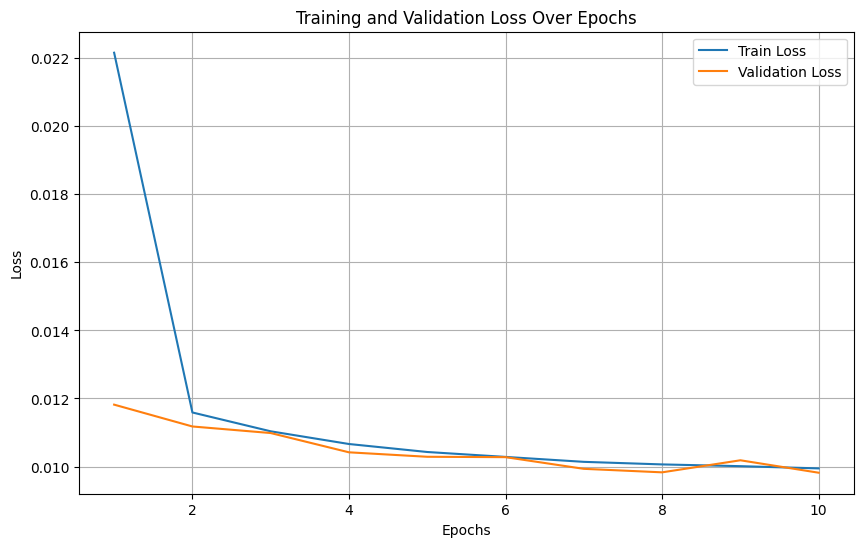

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label="Train Loss")
plt.plot(range(1, epochs + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

After 10 epochs of training and without too much tweaking to the actual architecture we've achieved 0.01 MSE loss on the test set for energy prediction.

Finally, we can compare our model's predictions to a random sample of the data from our test set.

In [15]:
sample_indices = torch.randperm(X_test.size(0))[:20]
predictions = model(X_test[sample_indices])

pred_df = pd.DataFrame({'True': y_test[sample_indices].flatten().numpy(), 'Prediction': predictions.detach().flatten().numpy()})
display(pred_df)

,True,Prediction
0,0.991,0.925071
1,0.251,0.215798
2,0.661,0.713049
3,0.781,0.792888
4,0.929,0.885397
5,0.553,0.545238
6,0.666,0.516254
7,0.848,0.857526
8,0.419,0.442765
9,0.365,0.406490


From this, we find that when presented with new songs, our model does produce predictions of their `energy` which are reasonably close to the true value. Thus, we can conclude that our neural network can accurately predict the `energy` of new songs.